# Data Mining for Business Analytics
## Homework 2 Solutions

Student Name: Solutions

Student Netid: Solutions
***

### Part 1: Data Mining
1\. For each of the following examples, tell me whether they are describing "Data Mining" or "Data Mining in Use". For "Data Mining" tasks, please replace **`ANS`** with **`DM`**. For "Data Mining in Use", please replace it with **`USE`**. **[*3 points each*]**.

a) [**`DM`**] Building a decision tree to predict if users will cancel their cell phone plan in the next billing cycle.

b) [**`DM`**] Using the attributes of my data to find clusters of users that may be beneficial to my business.

c) [**`USE`**] Processing 1,000 new applicants through a logistic regression to determine if I should grant them a loan.

d) [**`USE`**] Predict whether a customer is pregnant.

e) [**`DM`**] Find patterns indicating what customer behavior is more likely to lead to response to an on-line ad.

***

### Part 2: Modeling
As data scientists we will build many models both in class and in the real world. So far this semester we have learned a few different types of models: decision trees, logistic regression, SVMs, and linear regressions. In your own words please explain what the *modeling phase* of the Data Mining Cycle is doing. Why do we even bother modeling? What is the point? What is our goal? **This explanation should be around 7 sentences.** Be precise but concise. **[*15 points*]**.

The modeling phase of the data mining process is aiming to build a **simplified version of reality**. We want to create a representation of reality so that we can use models to classify or predict new data that we have never seen. Modeling will allow us to learn from out data and systematically apply what we have learned to new data. This allows us to make predictions using data and not simple intuition. Being able to predict new data is crucial to data mining and data science. If we can't use data to learn something about new data then we are not fully utilizing our data!

***

### Part 3: Decision Trees
For these problems calculate the given quantity. There are two possible classes in Question 1 and three possible classes in Questions 2 and 3. Since calculations of entropy only require us to use logs and basic multiplication, you should be able to easily show your work by typing. **Answers without work will be given at most half credit.**

1\. Consider this population. What is the entropy? **[*8 points*]**.
<br /><img src="images/q3-1.png" height=144px width=142px style="float: left"/>

$$
\begin{align}
entropy &= -p_1log_2(p_1) - p_2log_2(p_2) \\
        &= -0.4log_2(0.4) - 0.6log_2(0.6) \\
        &= -0.4(-1.322) - 0.6(-0.737) \\
        &= 0.971
\end{align}
$$

2\. Consider this population. What is the entropy? **[*8 points*]**.
<br /><img src="images/q3-2.png" height=144px width=142px style="float: left"/>

$$
\begin{align}
entropy &= -p_1log_2(p_1) - p_2log_2(p_2) - p_3log_2(p_3) \\
        &= -0.266log_2(0.266) - 0.4log_2(0.4) - 0.33log_2(0.33) \\
        &= -0.266(-1.911) - 0.4(-1.322) - 0.33(-1.600) \\
        &= 1.560
\end{align}
$$

3\. Consider these two potential splits on the first node of a decision tree. Calculate the information gain obtained with Split A and Split B. Which split is more desirable? Why? **[*14 points*]**.
<br /><img src="images/q3-3a.png" height=300px width=300px style="float: left; padding-right: 20px;"/> <img src="images/q3-3b.png" height=300px width=300px style="float: left; padding-left: 20px"/>

$IG = entropy(parent) - [p(child_1) \cdot entropy(child_1) + p(child_2) \cdot entropy(child_2)]$

We already know the entropy of the parent from Question 2 is 1.56.

Split A:

$$
\begin{align}
entropy(child_1) &= -0.625log_2(0.625) - 0.375log_2(0.375) \\
                 &= -0.625(-0.678) - 0.375(-1.415) \\
                 &= 0.954 \\
entropy(child_2) &= -0.143log_2(0.143) - 0.143log_2(0.143) - 0.714log_2(0.714) \\
                 &= -0.143(-2.806) - 0.143(-2.806) - 0.714(-0.486) \\
                 &= 1.150 \\
IG &= 1.56 - \Big(\frac{8}{15} \cdot 0.954 + \frac{7}{15} \cdot 1.150\Big) \\
   &= 1.56 - 1.045 \\
   &= 0.515
\end{align}
$$

Split B:

$$
\begin{align}
entropy(child_1) &= -1log_2(1.0) \\
                 &= -1(0) \\
                 &= 0 \\
entropy(child_2) &= -0.44log_2(0.44) - 0.55log_2(0.55) \\
                 &= -0.44(-1.184) - 0.55(-0.862) \\
                 &= 0.995 \\
IG &= 1.56 - \Big(\frac{6}{15} \cdot 0 + \frac{9}{15} \cdot 0.995\Big) \\
   &= 1.56 - 0.597 \\
   &= 0.963
\end{align}
$$

We should prefer Split B since it leads to large information gain! We get more information from this split than the the first split.

***

### Part 4: Decision trees vs. Linear discriminant models
What are the similarities and differences of decision trees and linear discriminant models? When might you prefer to use one over another? **This explanation should be around 7 sentences.** Be precise but concise. **[*15 points*]**.

Decision trees and linear discriminant models are both types of models that we use to build simplified representations of reality. Both models create linear boundaries, but decision trees are restricted to only building boundaries that are *perpendicular* whereas linear discriminant models can build a linear boundary at any angle. Additionally, decision trees are able to create *many* boundaries for one problem while a linear discriminant model may only build a single boundary. This means that decision trees are able to create more precise decision surfaces which can help fit non-smooth data! Trees are also generally easier to understand and explain to others --- they can be thought of as simple rules.

***

### Part 5. Hands-on

For your hands-on excercise, I am going to ask you to build two different models and show me the impact of training/fitting them with different amounts of data. For this example we will be using the `data/cell2cell.csv` data.

These historical data consist of 31,892 customers: 15,855 customers that churned (i.e., left the company) and 16,036 that did not churn. Here are the data set's 12 columns:

```
Col.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
12    churndep   Did the customer churn (1=Yes; 0=No)
```

The first 11 columns are our attributes/features. The last column, `"churndep"`, is the target variable.

1\. I would like for you to create a decision tree using entropy with no max depth and a logistic regression. For each of these models, I would like you to assign 10% to 90% of the data to training (in increments of 10%) and the rest to test. For each training set, I would like you to fit both models and then get the accuracy on the remaining data used for test for both models. Finally, create a plot where the x-axis includes 0.10 to 0.90 (one tick for each training data percentage) and the y-axis indicates accuracy. Your plot should have two lines/curves on it: one for the decision tree and one for logistic regression. Remember to put a legend. **[*15 points*]**.

*Hint: This should look somewhat similar to the team work we did in the Hands-on material in Module 4.*

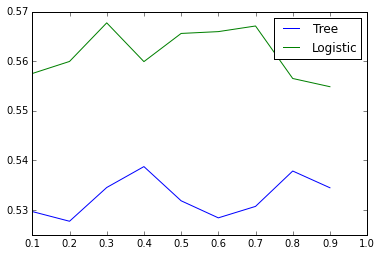

In [4]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
%matplotlib inline

# Read in our csv data
data = pd.read_csv("data/cell2cell.csv")

# Put all features into X and the target variable into Y
X = data.drop(["churndep"], 1)
Y = data["churndep"]

# Prepare to do some training and testing
training_percentages = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
tree_accuracies = []
logistic_accuracies = []

# Loop through your training percentages, split your data with each percentage, 
#  create both models, fit/train both models, predict with your models and 
#  append each accuracy to the correct list
for training_percentage in training_percentages:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = training_percentage)
    
    # Create both models
    tree = DecisionTreeClassifier(criterion="entropy")
    logistic = LogisticRegression()
    
    # Fit both models
    tree.fit(X_train, Y_train)
    logistic.fit(X_train, Y_train)
    
    # Get predictions from both models
    Y_test_predicted_tree = tree.predict(X_test)
    Y_test_predicted_logistic = logistic.predict(X_test)

    # Get the accuracy for the models' predictions
    tree_acc = accuracy_score(Y_test_predicted_tree, Y_test)
    logistic_acc = accuracy_score(Y_test_predicted_logistic, Y_test)
    
    # Now that I have a tree and logistic accuracy, I should add them to my list of accuracies
    tree_accuracies.append(tree_acc)
    logistic_accuracies.append(logistic_acc)
    
# Plot two curves on one plot. Don't forget labels and your legend
plt.plot(training_percentages, tree_accuracies, label="Tree")
plt.plot(training_percentages, logistic_accuracies, label="Logistic")
plt.legend()

2\. Is this a learning curve or a fitting curve? What is the difference? What does each one show us? **[*5 points*]**.

This is a learning curve. In a learning curve we use different amounts of training data and plot the results of our model on the hold-out data. Learning curves hold the model complexity constant. A fitting curve would hold the amount of training data constant and would plot hold-out performance for different model complexities.

3\. What do you observe in the above graph? Anything interesting? There is no right answer. In fact, you will most likely see a different (although possibly similar) plot when compared to your friends. Why do you think each person's plot will look different? If you were to rerun the cell above this, you would probably get a different plot again. Why do you think this is the case? **[*5 points*]**.

The plot above shows that varying the amount of training data seems to lead to very small fluctuations in performance. We generally only see a variance in about 1%. Additionally, we see that the logistic model outperforms the tree model in all cases!

Different results will occur due to different train/test splits. This is a random process! Depending on what data is assigned to training or testing, we can see drastically different results.